<a href="https://colab.research.google.com/github/sanas2211/ML-and-Big-data/blob/main/pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark matplotlib pandas

In [ ]:
#step 1: import the necesseary lib
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, sum,

#step 2: initialzize a spark session
spark = SparkSession.builder.appName("Titanic Data Analysis").getOrCreate()

#step 3: Load the dataset
titanic_df=spark.read.csv("Titanic-Dataset.csv", header=True, inferSchema=True)

#show the first few rows of the dataset
titanic_df.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [ ]:
#step 4: Basic Data Exploration
#check the schema of the dataset
titanic_df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [ ]:
titanic_df.describe().show()

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                NULL|  NULL| 29.69911764705882|0.5230078563411896|0.38159371492704824|260318.54916792738| 32.20420

In [ ]:
#count missing value for each column
missing_values = titanic_df.select([((1-(count(col(c))/count("*")))*100).alias(c) for c in titanic_df.columns])
missing_values.show()

+-----------+--------+------+----+---+------------------+-----+-----+------+----+----------------+-------------------+
|PassengerId|Survived|Pclass|Name|Sex|               Age|SibSp|Parch|Ticket|Fare|           Cabin|           Embarked|
+-----------+--------+------+----+---+------------------+-----+-----+------+----+----------------+-------------------+
|        0.0|     0.0|   0.0| 0.0|0.0|19.865319865319865|  0.0|  0.0|   0.0| 0.0|77.1043771043771|0.22446689113355678|
+-----------+--------+------+----+---+------------------+-----+-----+------+----+----------------+-------------------+



In [ ]:
#step 5: Data Transformation
#create a new column 'Survived' with 1 for
titanic_df = titanic_df.withColumn("Survived", col("Survived").cast("int"))
titanic_df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

In [ ]:
#step 6: Grouping and aggregation
survival_rate_by_gender = titanic_df.groupBy("Sex").agg(
    (sum("Survived")/count("Survived")*100).alias("Survival_Rate")
)
survival_rate_by_gender.show()

+------+------------------+
|   Sex|     Survival_Rate|
+------+------------------+
|female| 74.20382165605095|
|  male|18.890814558058924|
+------+------------------+



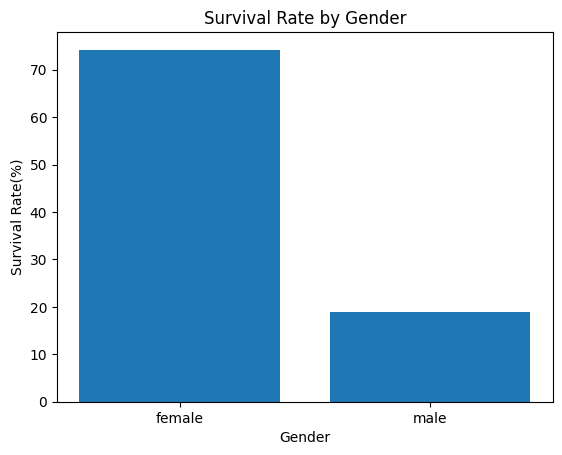

In [ ]:
#optional step: visualization(Reqires matplot and pandas)
#convert to pandas dataframe for visualization
panda_df = survival_rate_by_gender.toPandas()
import matplotlib.pyplot as plt

#plotting the survival rate by gender
plt.bar(panda_df["Sex"], panda_df["Survival_Rate"])
plt.xlabel("Gender")
plt.ylabel("Survival Rate(%)")
plt.title("Survival Rate by Gender")
plt.show()


In [ ]:
#step 7: stop park session
spark.stop()